#Intoduction

By Diyun Lu and Yihan Zhong

In this notebook, we are going to apply different kinds of filtering in order to **detect the edges** and **blur the image** for the image preprocessing.
*  The **gradient** filtering is used to detect the edge of the images. 
  * In opevCV, we can choose different operators for gradient filtering, for example, **Sobel** and **Scharr** gradients.

* The **average** filtering is to smooth and blur the image by reducing the amount of intensity variation between neigbouring pixels. 

* **Gaussian** filtering also serves to blur the image and reduce the noise but usee two parameters: kernel size and sigma, which we will discuss in the below experimentation


* **Low-pass filtering**, also known as a smoothing filter, removes high-frequency content from an image. It is also used to blur images. **High Pass Filtering** removes low frequency regions while preserving or enhancing high frequency components. 


## Import packages

In [ ]:
import numpy as np 
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import math

This step is to make the output size the same as original one after convolution

In [ ]:
def padding(image,ksize):# the input image and the kernel size

    h = image.shape[0] # the size of the image
    w = image.shape[1]
    c = image.shape[2]

    pad = ksize // 2 # the size for padding
    out_p = np.zeros((h+2*pad,w+2*pad,c)) # this will create a zero matrix after padding
    out_copy = image.copy()
    out_p[pad:pad+h,pad:pad+w,0:c] = out_copy.astype(np.uint8) # this will copy the original image into the targeted image

    return out_p

## Gradient filter

We use image gradients as the basic element in many computer vision and image processing applications.

Normally, the main application of image gradients are relevant with edge detection.

OpenCV provides three types of gradient filters: Sobel, Scharr and Laplacian. They are High-pass filters.

Sobel operators is a joint Gausssian smoothing plus differentiation operation. It is more resistant to noise. 

We can define the direction of derivatives to be taken, vertical or horizontal using yorder and xorder respectively. Also, we can specify the size of kernel by the argument k_size. 

If k_size = -1, a 3x3 Scharr filter is used which gives better results than 3x3 Sobel filter. We presented these images after different filterings as shown below.




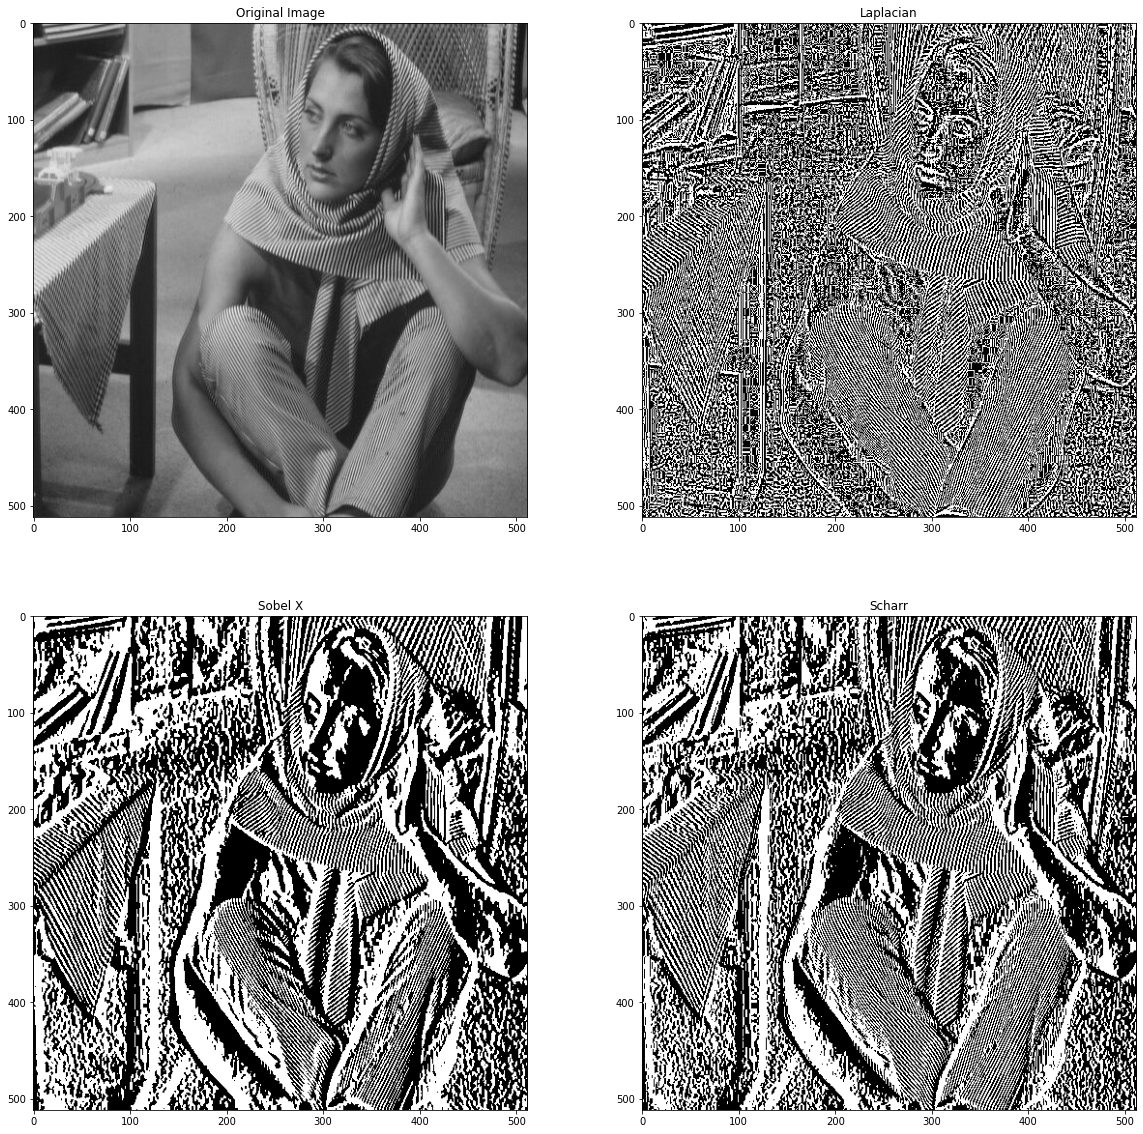

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

path = "/content/barbara.jpg"
img = cv2.imread(path)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
scharr = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=-1)

f = plt.figure(figsize=(20,20))
ax = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)

ax.imshow(img, cmap = 'gray')
ax.set_title('Original Image')

ax2.imshow(laplacian, cmap = 'gray')
ax2.set_title('Laplacian')

ax3.imshow(sobelx, cmap = 'gray')
ax3.set_title('Sobel X')

ax4.imshow(scharr, cmap = 'gray')
ax4.set_title('Scharr')

plt.show()

## Sobel filtering

Sobel filtering is one kind of gradient filtering used for detecting the edge. 
Because for a two-dimensional matrix of a gray-scale image, each value in the matrix corresponds to the grayscale value of each pixel of the image.
Then, for the edge, it is the place where the grayscale changes the most, therefore, the point with the largest grayscale gradient value

In [ ]:
def sobel(image,operator_type,ksize=3):

#define the direction of deriviation
    if operator_type == "horizontal": 
        sobel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]]) # this filter will attract the horizontal features because the horizontal values are all zero
    elif operator_type == "vertical":
        sobel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])# this filter will attract the vertical features because the horizontal values are all zero
    else:
        print("type error") # if the user does not define the deriviation type

    h = image.shape[0]
    w = image.shape[1]
    c = image.shape[2]
    pad=ksize // 2

    out_p = padding(image,ksize=3) # padding the edge of the image

    tmp = out_p.copy()

    for y in range(h):
        for x in range(w):
            for z in range(c):
               out_p[pad+y,pad+x,z] = np.sum(sobel*tmp[y:y+ksize,x:x+ksize,z])

    out = out_p[pad:pad+h,pad:pad+w].astype(np.uint8)
    out = out.clip(0,255) # Crops the pixels, limiting the resulting pixel value to the range 0-255.
    return out

Plot the image after sobel filtering

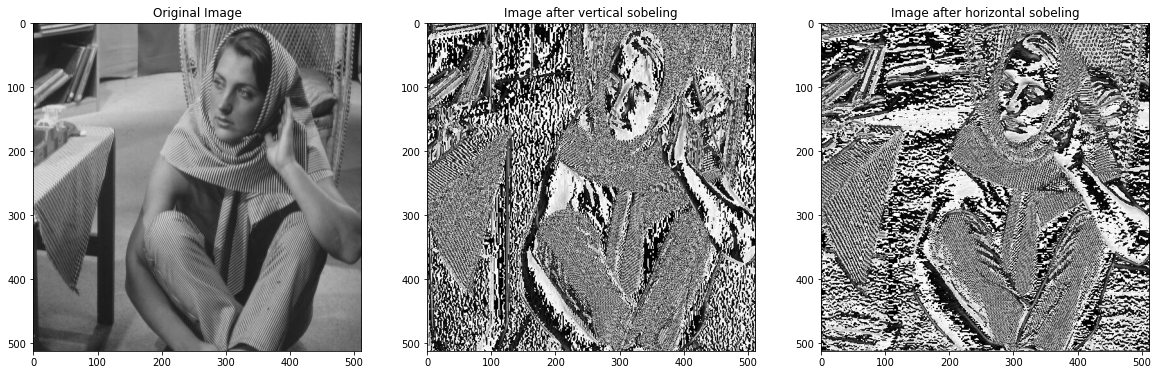

In [ ]:
path = "/content/barbara.jpg"
img = cv2.imread(path)
sober_img_1 = sobel(img,"vertical",3)
sober_img_2 = sobel(img,"horizontal",3)
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

ax.imshow(img, cmap = 'gray')
ax.set_title('Original Image')

ax2.imshow(sober_img_1, cmap = 'gray')
ax2.set_title('Image after vertical sobeling')

ax3.imshow(sober_img_2, cmap = 'gray')
ax3.set_title('Image after horizontal sobeling')

plt.show()

### Interpretation
As we can see that in the second picture on which we apply vertical mask, all the vertical edges are more visible than the original image. Similarly in the second picture we have applied the horizontal mask and in result all the horizontal edges are visible.



## Averaging filter

The Averaging Filter technique takes the average of all the pixels under the kernel area and replaces the central element. 

In a convolution operation, the filter slides over the image, finds the average of all pixels under the kernel region, and replaces that average with the center element of the image.

The smoothing of the image depends on the kernel size. If the kernel size is large, then it removes small features of the image. But if the kernel size is too small, the noise cannot be removed.

Text(0.5, 1.0, 'Averaging Filter')

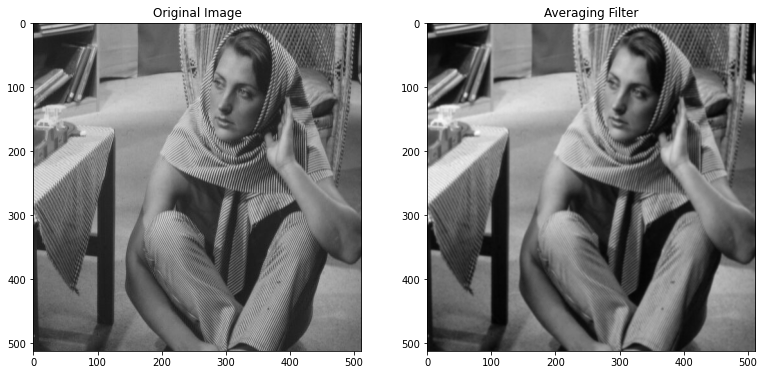

In [ ]:
image = cv2.imread('/content/barbara.jpg', 0);
width = image.shape[1]
height = image.shape[0]
result = np.zeros((image.shape[0], image.shape[1]), int)

def meanFilter():
  for row in range(height):
     for col in range(width):  
         currentElement=0; left=0; right=0; top=0; bottom=0; topLeft=0; 
         topRight=0; bottomLeft=0; bottomRight=0;
         counter = 1           
         currentElement = image[row][col]

         if not col-1 < 0:
             left = image[row][col-1]
             counter +=1                        
         if not col+1 > width-1:
             right = image[row][col+1]
             counter +=1 
         if not row-1 < 0:
             top = image[row-1][col]
             counter +=1 
         if not row+1 > height-1:
             bottom = image[row+1][col]
             counter +=1 

         if not row-1 < 0 and not col-1 < 0:
             topLeft = image[row-1][col-1]
             counter +=1 
         if not row-1 < 0 and not col+1 > width-1:
             topRight = image[row-1][col+1]
             counter +=1 
         if not row+1 > height-1 and not col-1 < 0:
             bottomLeft = image[row+1][col-1]
             counter +=1 
         if not row+1 > height-1 and not col+1 > width-1:
             bottomRight = image[row+1][col+1]
             counter +=1

         total = int(currentElement)+int(left)+int(right)+int(top)+int(bottom)+int(topLeft)+int(topRight)+int(bottomLeft)+int(bottomRight)
         avg = total/counter
         result[row][col] = avg

meanFilter()
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(131)
ax1 = f.add_subplot(132)

ax.imshow(img, cmap = 'gray')
ax.set_title('Original Image')

ax1.imshow(result, cmap = 'gray')
ax1.set_title('Averaging Filter')


## Gassian filter

The Gaussian convolution kernel is generated according to the two-dimensional Gaussian distribution law, and the formula is:

G(x,y) = (1/(2*pi*(sigma)^2))*e^(-(x^2+y^2)/2*sigma^2)

The only unknown variable in the above function is Gaussian **standard deviation sigma**: 

If it is non-positive, it is computed from ksize as **sigma** = 0.3*((ksize-1)*0.5 - 1) + 0.8 .(https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#getgaussiankernel)

In [ ]:
def gaussian(image,ksize,sigma):
    out_p = padding(image,ksize) # image after padding

    pad=ksize //2

    h = image.shape[0]
    w = image.shape[1]
    c = image.shape[2]

    # gaussian convolution kernel
    kernel = np.zeros((ksize,ksize))
    for x in range(-pad,-pad+ksize):
        for y in range(-pad,-pad+ksize):
          # apply gaussian pdf
            kernel[y+pad,x+pad] = np.exp(-(x**2+y**2)/(2*(sigma**2)))
    kernel /= (sigma*np.sqrt(2*np.pi))
    kernel /=  kernel.sum()

    tmp = out_p.copy()
    for y in range(h):
        for x in range(w):
            for z in range(c):
                out_p[pad+y,pad+x,z] = np.sum(kernel*tmp[y:y+ksize,x:x+ksize,z]) # applying convolution

    out = out_p[pad:pad+h,pad:pad+w].astype(np.uint8)
  
    return out	

Plot the image after gaussian filtering

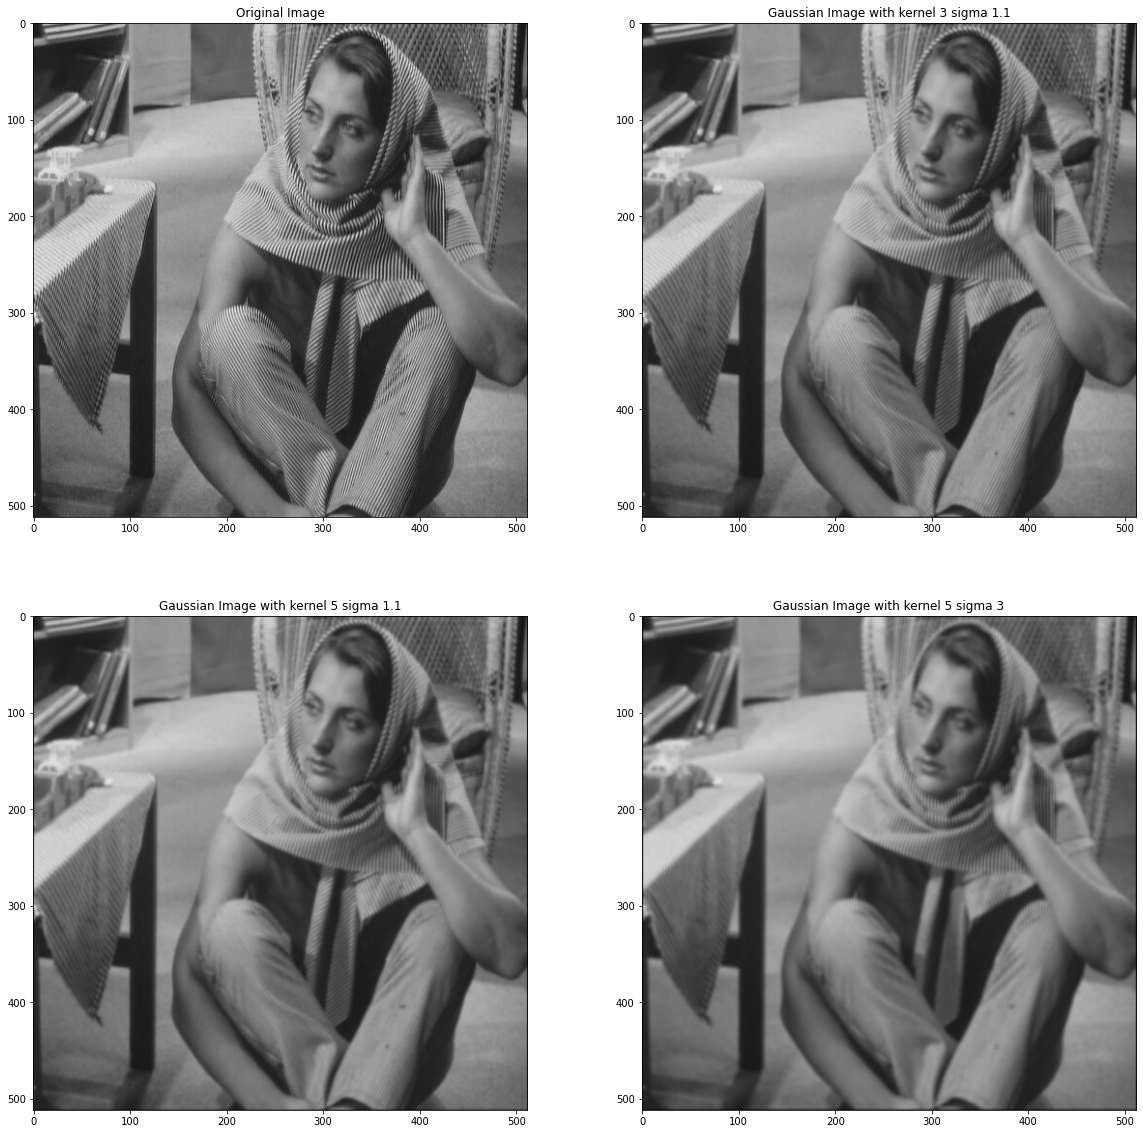

In [ ]:
path = "/content/barbara.jpg"
img = cv2.imread(path)
gaussian_img_1 = gaussian(img,3,1.1)
gaussian_img_2 = gaussian(img,5,1.1)
gaussian_img_3 = gaussian(img,5,3)

f = plt.figure(figsize=(20,20))
ax = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)

ax.imshow(img, cmap = 'gray')
ax.set_title('Original Image')

ax2.imshow(gaussian_img_1, cmap = 'gray')
ax2.set_title('Gaussian Image with kernel 3 sigma 1.1')

ax3.imshow(gaussian_img_2, cmap = 'gray')
ax3.set_title('Gaussian Image with kernel 5 sigma 1.1')

ax4.imshow(gaussian_img_3, cmap = 'gray')
ax4.set_title('Gaussian Image with kernel 5 sigma 3')

plt.show()

### Interpretation

From the result we can see after applying gaussian flitering, the the photo is more smooth, for example, the texture of the scarf, the chair, the pents become less angular.

It can also be observed that by adding kernel size and augmenting sigma, the picture become more smoothing. 